In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

#平均
def mean(x):
    return sum(x) / len(x)

#分散
def variance(x):
    x_bar = mean(x)
    return sum((x_i - x_bar) ** 2 for x_i in x) / len(x)

#標準偏差
def standard_deviation(x):
    return math.sqrt(variance(x))

#分位数
def quantile(x, p):
    index = int(p * len(x))
    return sorted(x)[index]

#内積
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

#ベクトルの大きさ
def magnitude(x):
    return math.sqrt(dot(x, x))

#カラム毎に平均0、分散1にする
def standard_scaler(X):
    means = np.array([mean(X[:, i]) for i in range(len(X[0]))])
    stddevs = np.array([standard_deviation(X[:, i]) for i in range(len(X[0]))])
    return (X - means) / stddevs

#カラム毎に最大値1、最小値0にする
def min_max_scaler(X):
    mins = np.array([min(X[:, i]) for i in range(len(X[0]))])
    maxes = np.array([max(X[:, i]) for i in range(len(X[0]))])
    return (X - mins) / (maxes - mins)

#standard_scalerに似ている、外れ値に対して頑強
def robust_scaler(X):
    q1s = np.array([quantile(X[:, i], 0.25) for i in range(len(X[0]))])
    q2s = np.array([quantile(X[:, i], 0.50) for i in range(len(X[0]))])
    q3s = np.array([quantile(X[:, i], 0.75) for i in range(len(X[0]))])
    return (X - q2s) / (q3s - q1s)

#データの方向が問題になるときに用いる
def normalizer(X):
    mags = np.array([[magnitude(X_i)] for X_i in X])
    return X / mags


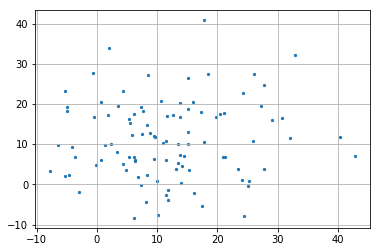

In [2]:
#平均10、分散10の正規分布から、乱数を生成
X = np.random.normal(10, 10, (100, 2))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.grid()
plt.show()


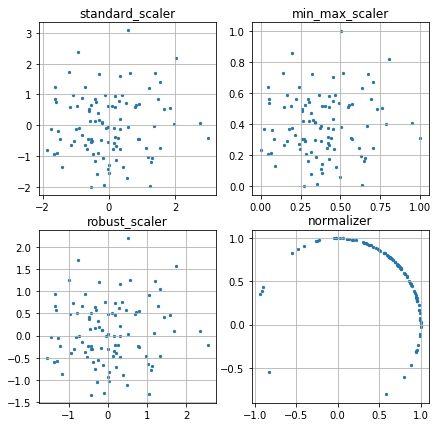

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
titles = ['standard_scaler', 'min_max_scaler', 'robust_scaler', 'normalizer']

for function, ax, title in zip([standard_scaler, min_max_scaler, robust_scaler, normalizer], axes.ravel(), titles):
    rescaled_X = function(X)
    ax.scatter(rescaled_X[:, 0], rescaled_X[:, 1], s=5)
    ax.set_title(title)
    ax.grid()
    

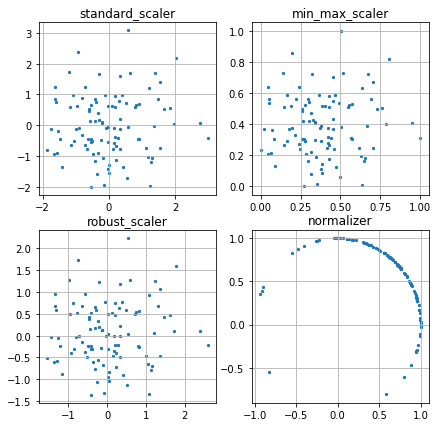

In [4]:
#sklearnの変換と比較
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
titles = ['standard_scaler', 'min_max_scaler', 'robust_scaler', 'normalizer']

for function, ax, title in zip([StandardScaler, MinMaxScaler, RobustScaler, Normalizer], axes.ravel(), titles):
    scaler = function()
    rescaled_X = scaler.fit_transform(X)
    ax.scatter(rescaled_X[:, 0], rescaled_X[:, 1], s=5)
    ax.set_title(title)
    ax.grid()
    